Simulation complete. Results in ieee_results


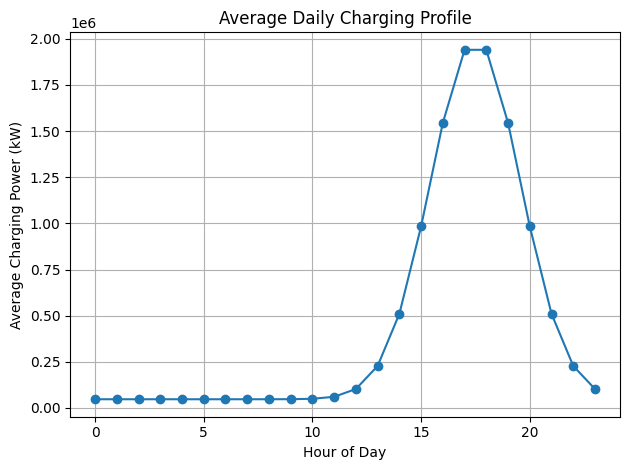

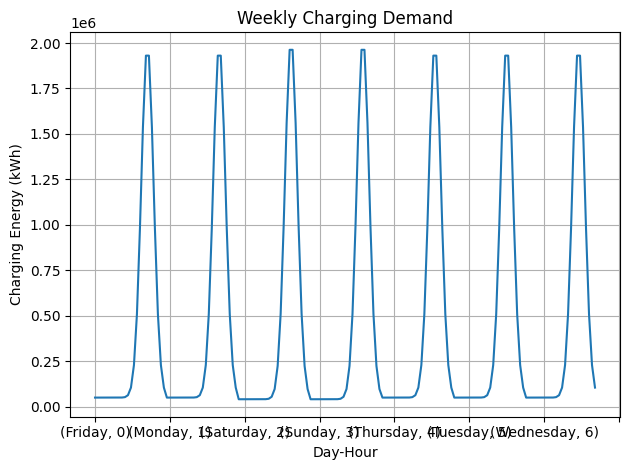

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

from carRecharge import CarRecharge
from carDistribution import CarDistribution

# Parameters
FLEET_SIZE = 200_000       # vehicles
EFFICIENCY = 20.0          # kWh/100 km
DAILY_DISTANCE = 40.0      # km/day
HORIZON_DAYS = 7
OUTPUT_DIR = "ieee_results"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# 1) Get weekly charging profile from model
cr = CarRecharge()
profile = cr.get_weekly_profile()  # DataFrame: Day, Hour, ChargingPerc

# 2) Calculate energy demand profile (kWh)
daily_energy_per_vehicle = EFFICIENCY * DAILY_DISTANCE / 100.0
weekly_energy_per_vehicle = daily_energy_per_vehicle * HORIZON_DAYS
total_weekly_energy = weekly_energy_per_vehicle * FLEET_SIZE  # kWh

profile["Energy_kWh"] = profile["ChargingPerc"] * total_weekly_energy

# 3) Save full profile
profile.to_csv(os.path.join(OUTPUT_DIR, "weekly_profile.csv"), index=False)

# 4) Daily profile plot
daily_profile = profile.groupby("Hour")["Energy_kWh"].mean()
plt.figure()
daily_profile.plot(kind="line", marker="o")
plt.xlabel("Hour of Day")
plt.ylabel("Average Charging Power (kW)")
plt.title("Average Daily Charging Profile")
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "daily_profile.png"), dpi=300)

# 5) Weekly profile plot
plt.figure()
profile.groupby(["Day", "Hour"])["Energy_kWh"].sum().plot()
plt.xlabel("Day-Hour")
plt.ylabel("Charging Energy (kWh)")
plt.title("Weekly Charging Demand")
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "weekly_profile.png"), dpi=300)

# 6) Peak demand
peak_row = profile.loc[profile["Energy_kWh"].idxmax()]
peak_power = peak_row["Energy_kWh"]
peak_time = f"{peak_row['Day']} {int(peak_row['Hour'])}:00"

# 7) Summary file
summary = {
    "Fleet size": FLEET_SIZE,
    "Efficiency (kWh/100km)": EFFICIENCY,
    "Daily distance (km)": DAILY_DISTANCE,
    "Total weekly energy (MWh)": total_weekly_energy / 1000,
    "Peak power (MW)": peak_power / 1000,
    "Peak time": peak_time
}
pd.DataFrame([summary]).to_csv(os.path.join(OUTPUT_DIR, "summary.csv"), index=False)

print("Simulation complete. Results in", OUTPUT_DIR)
